In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

sns.set_palette('tab10')

In [227]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.5, random_state=42069)
X = pd.DataFrame(X, columns=["x","y"])

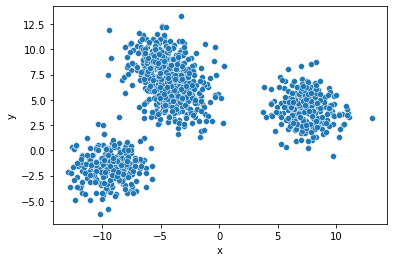

In [228]:
sns.scatterplot(data=X, x="x",y="y");

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


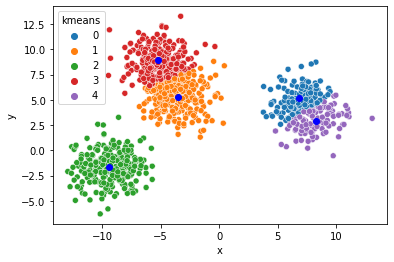

In [229]:
kmeans = KMeans(5, max_iter=300)
kmeans.fit(X);

X["kmeans"] =  kmeans.labels_
X["kmeans"] = X["kmeans"].astype('category')


sns.scatterplot(data=X, x="x",y="y", hue='kmeans');
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="b");

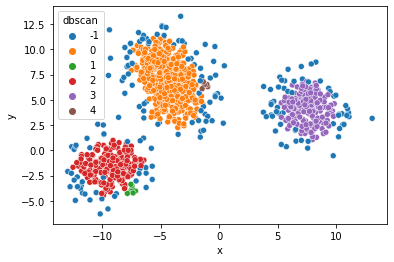

In [230]:
dbscan = DBSCAN().fit(X[['x','y']])

X['dbscan'] = dbscan.labels_
X["dbscan"] = X["dbscan"].astype('category')

sns.scatterplot(data=X, x="x",y="y", hue='dbscan');


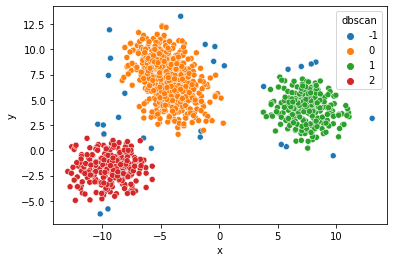

In [231]:
dbscan = DBSCAN(eps=1.0).fit(X[['x','y']])

X['dbscan'] = dbscan.labels_
X["dbscan"] = X["dbscan"].astype('category')

sns.scatterplot(data=X, x="x",y="y", hue='dbscan');

# Dimensionality Reduction

In [232]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [233]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [234]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [235]:
df.shape

(1599, 12)

PCA

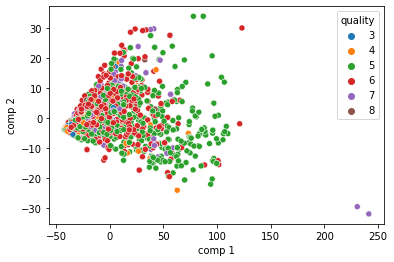

In [236]:
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)

df_pca = pd.DataFrame(x_pca, columns=['comp 1', 'comp 2'])
df_pca["quality"] = y

sns.scatterplot(data=df_pca, x='comp 1', y="comp 2", hue="quality", palette='tab10');

<AxesSubplot:xlabel='comp 1', ylabel='comp 2'>

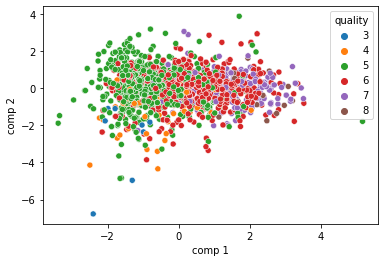

In [245]:
lda = LDA(n_components=2)
lda.fit(X,y)
x_lda = lda.transform(X)

df_lda = pd.DataFrame(x_lda, columns=['comp 1', 'comp 2'])
df_lda["quality"] = y

sns.scatterplot(data=df_lda, x='comp 1', y="comp 2", hue="quality", palette="tab10")

In [246]:
from pycaret.clustering import *


In [247]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.5, random_state=42069)


In [256]:
s = setup(X, normalize=True)
s

In [251]:
kmeans = create_model(kmeans)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:39:29
Status,. . . . . . . . . . . . . . . . . .,Fitting 4 Clusters
Estimator,. . . . . . . . . . . . . . . . . .,K-Means Clustering


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5917,3420.6359,0.5704,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [253]:
kmeans_result = assign_model(kmeans)
kmeans_result

,feature_1,feature_2,Cluster
0,-6.207326,4.797438,Cluster 1
1,5.307374,4.698174,Cluster 0
2,-10.498848,-4.171044,Cluster 2
3,-2.413122,5.094315,Cluster 1
4,-7.522442,-3.968923,Cluster 2
...,...,...,...
995,-5.047511,5.218723,Cluster 1
996,6.297087,4.787309,Cluster 0
997,-2.879916,4.437319,Cluster 1
998,9.132737,2.696357,Cluster 0


<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

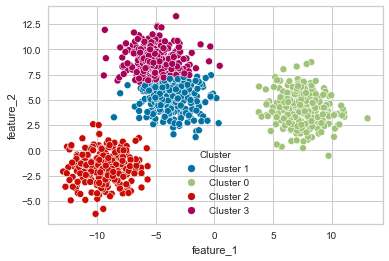

In [254]:
sns.scatterplot(data=kmeans_result, x="feature_1", y="feature_2", hue='Cluster')

In [257]:
print(kmeans)

KMeans(n_clusters=4)
